# Working memory dataset: Looking at pattern differences

In [1]:
import sys

import numpy as np
import pandas as pd
from pathlib import Path
import os
import nibabel as nb
import nitools as nt
import PcmPy as pcm
import seaborn as sb

# modules from functional fusion
import Functional_Fusion.atlas_map as am
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
# modules from connectivity
import cortico_cereb_connectivity.prepare_data as cprep
import selective_recruitment.rsa as rsa
import selective_recruitment.select_recruite as sr

In [2]:
base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/FunctionalFusion'
atlas_dir = base_dir + '/Atlases'


<font color = 'grey'>Defining functions specific to this dataset

In [3]:
DCereb, info, dataset = ds.get_dataset(base_dir,
                                            'WMFS',
                                            atlas='MNISymC3',
                                            sess='ses-02',
                                            type='CondRun')
G1,Ginf = rsa.calc_rsa(DCereb,info,center=True,reorder=['phase','recall'])

DCortex, info, dataset = ds.get_dataset(base_dir,
                                            'WMFS',
                                            atlas='fs32k',
                                            sess='ses-02',
                                            type='CondRun')
G2,Ginf  = rsa.calc_rsa(DCortex,info,center=True,reorder=['phase','recall'])


### Cerebellar RSA 

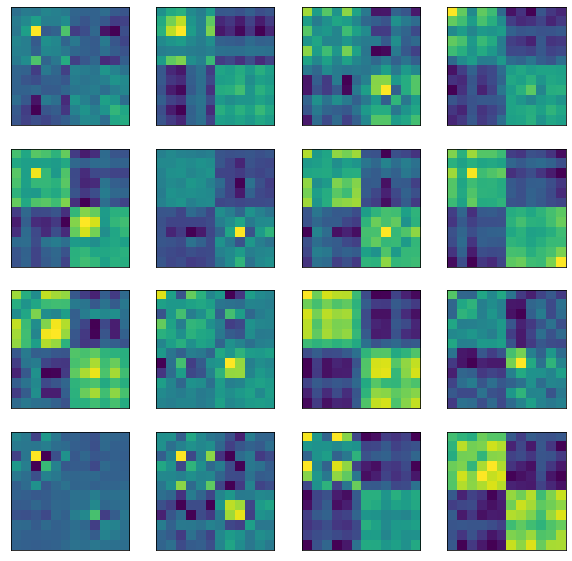

In [4]:
plt.figure(figsize=(10,10))
pcm.vis.plot_Gs(G1)

### Cortical RSA

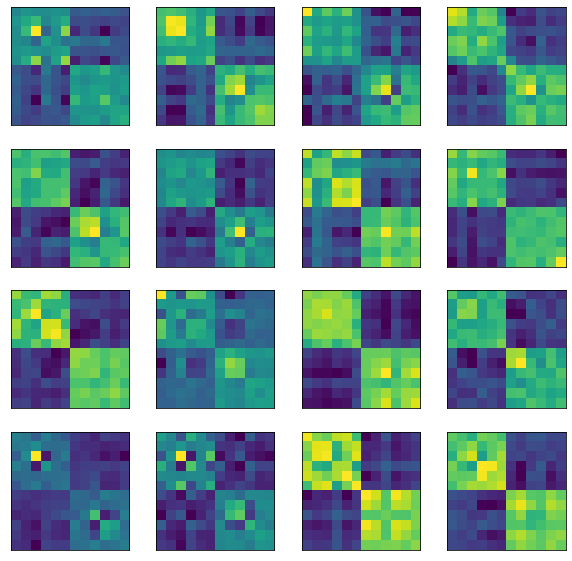

In [5]:
plt.figure(figsize=(10,10))
pcm.vis.plot_Gs(G2)


## Average cortical and cerebellar RSA

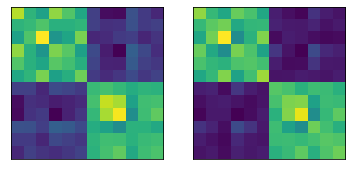

In [6]:
mG1 = G1.mean(axis=0)
mG2 = G2.mean(axis=0)
mG=np.stack([mG1,mG2])
pcm.vis.plot_Gs(mG,grid=(1,2))